In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
df.columns = ['Month', 'Milk in pounds per cow']

In [6]:
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.drop(168,axis = 0,inplace = True)

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [10]:
df.set_index('Month',inplace=True)

In [11]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [12]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [14]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

<Axes: xlabel='Month'>

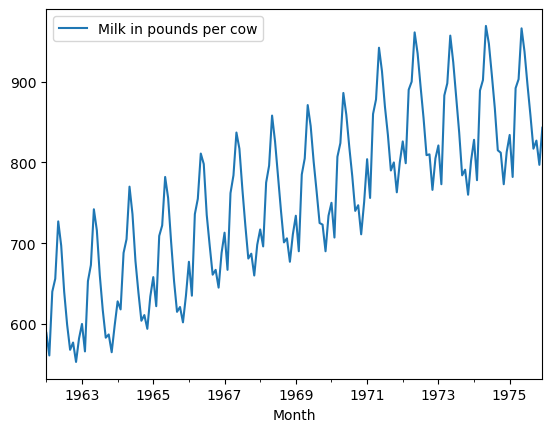

In [15]:
df.plot()

In [16]:
timeseries = df['Milk in pounds per cow']

In [17]:
type(timeseries)

pandas.core.series.Series

<Axes: xlabel='Month'>

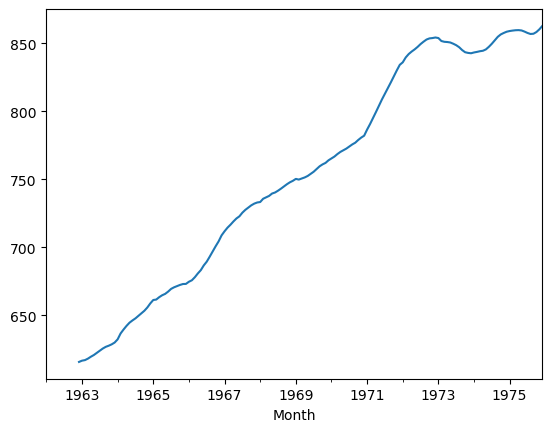

In [18]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

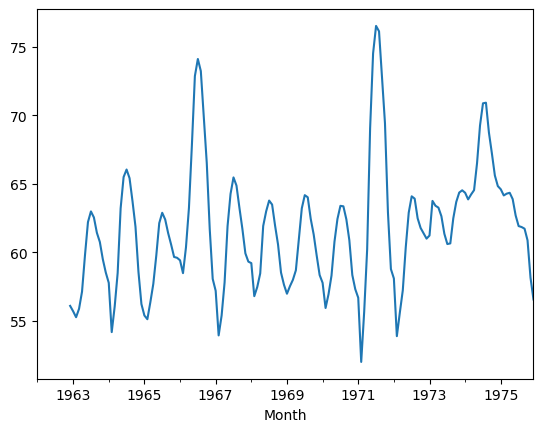

In [19]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

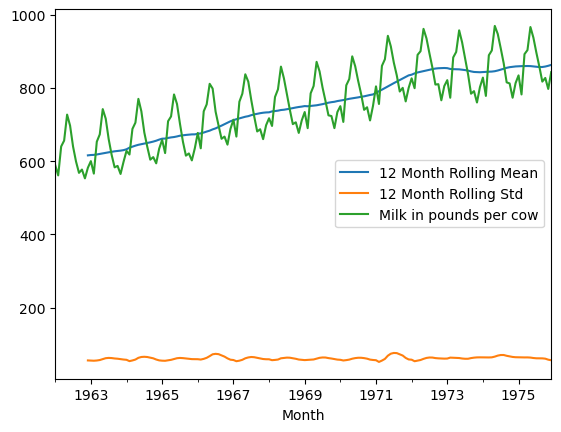

In [20]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

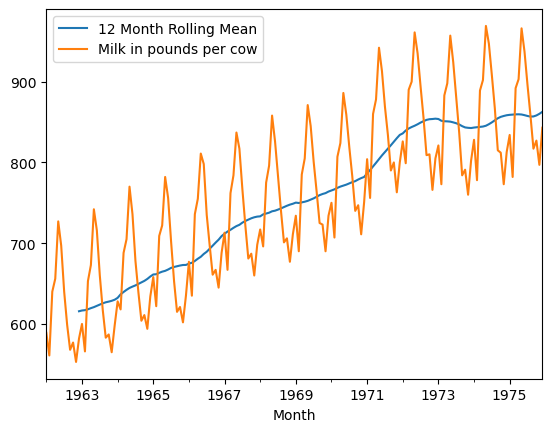

In [21]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'],freq = 12)  

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [24]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

NameError: name 'decomposition' is not defined

<Figure size 640x480 with 0 Axes>

In [25]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(df['Milk in pounds per cow'])

In [28]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [29]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [30]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.3038115874221303
p-value : 0.6274267086030312
#Lags Used : 13
Number of Observations Used : 154


In [31]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [33]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [34]:
df['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [35]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530793
p-value : 0.03006800400178488
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

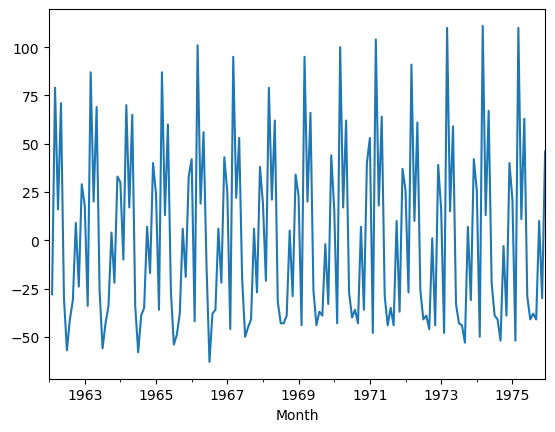

In [36]:
df['Milk First Difference'].plot()

In [37]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [38]:
df['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

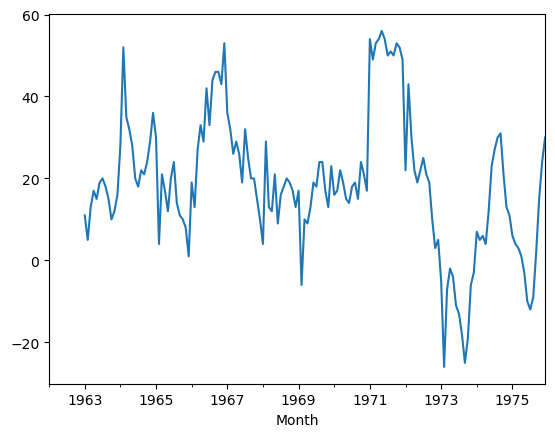

In [39]:
df['Seasonal Difference'].plot()

In [40]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [41]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

<Axes: xlabel='Month'>

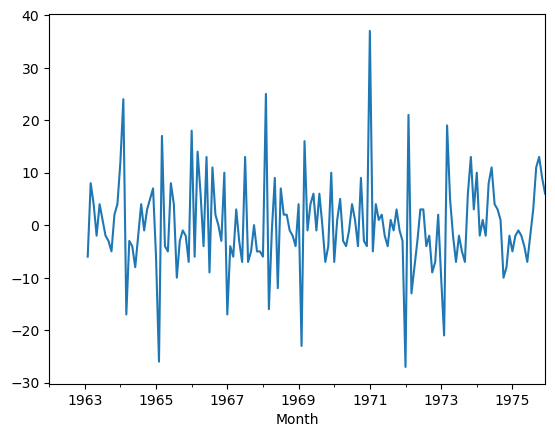

In [42]:
df['Seasonal First Difference'].plot()

In [43]:
df['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

In [44]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.03800227492198
p-value : 1.865423431878859e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Month'>

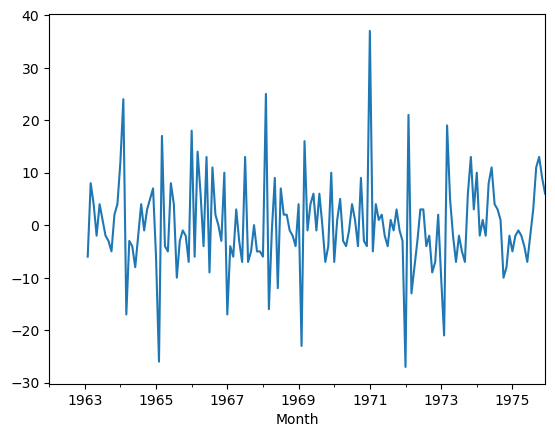

In [47]:
df['Seasonal First Difference'].plot()

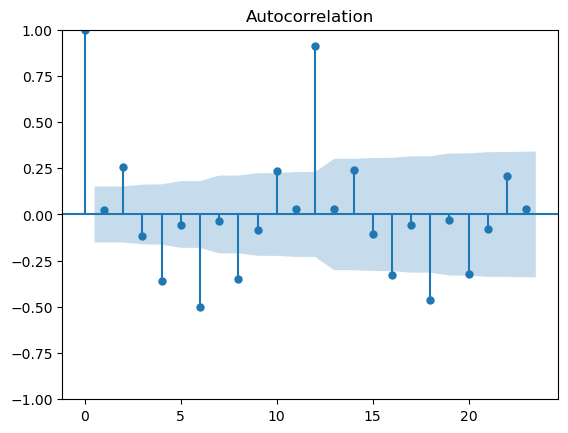

In [48]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [49]:
k=df["Milk First Difference"].dropna()
k

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 167, dtype: float64

In [51]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

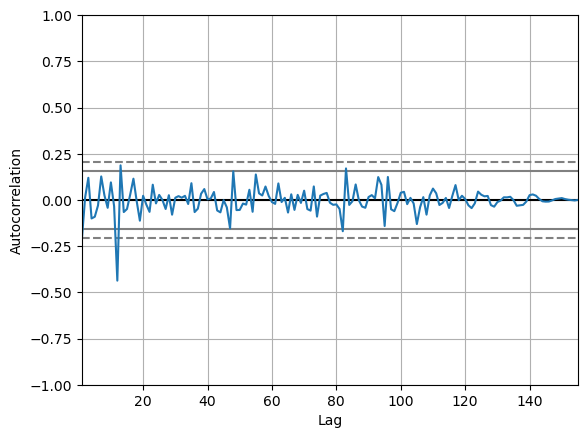

In [52]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

C:\Users\gavth\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


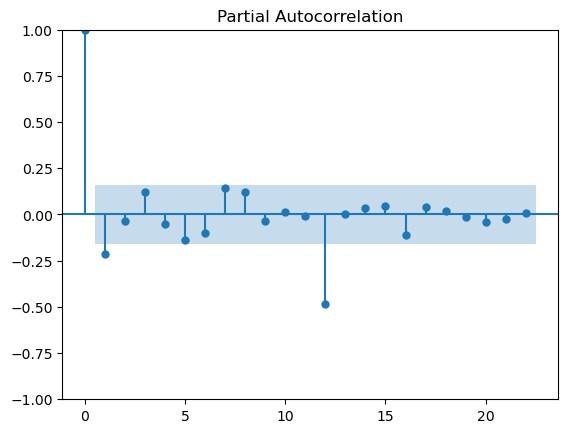

In [53]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

AttributeError: module 'statsmodels.graphics' has no attribute 'tsa'

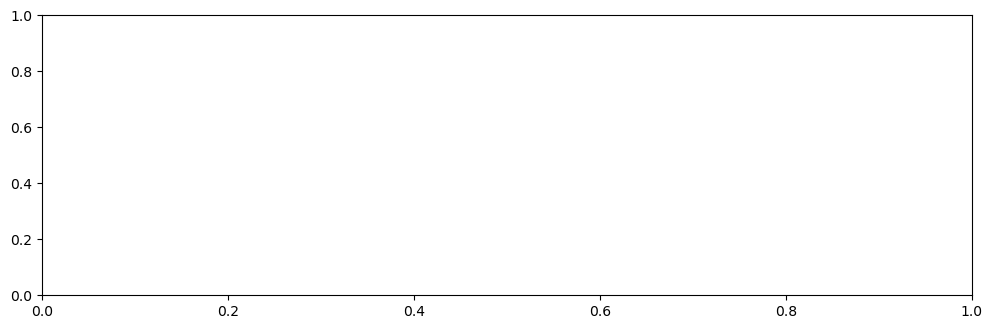

In [54]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax = ax2)

In [55]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,12))

AttributeError: module 'statsmodels.tsa' has no attribute 'statespace'

In [57]:
results = model.fit()
print(results.summary())

NameError: name 'model' is not defined

In [58]:
results.resid.plot()

NameError: name 'results' is not defined

In [ ]:
results.predict(start = 150,end = 168,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))df['forecast'] = 

In [59]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference
Month,,,,
1975-08-01,858.0,-38.0,-9.0,3.0
1975-09-01,817.0,-41.0,2.0,11.0
1975-10-01,827.0,10.0,15.0,13.0
1975-11-01,797.0,-30.0,24.0,9.0
1975-12-01,843.0,46.0,30.0,6.0


In [60]:
from pandas.tseries.offsets import DateOffset

In [61]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [62]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [63]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [64]:
future_df = pd.concat([df,future_dates_df])

In [65]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN
